# Part 1

1. Set random seed

In [2]:
import random
random.seed(1234)

2.Load the MNIST dataset

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


3.Implement a series of neural network models  
i. initial test

In [5]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
from sklearn.model_selection import train_test_split
train_images2, test_images2, train_labels2, test_labels2 = \
train_test_split(train_images, train_labels, test_size = 1/6, random_state = 1234)

In [10]:
init_result = network.fit(train_images2, train_labels2, \
                          validation_data=(test_images2, test_labels2), \
                          epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 34us/step - loss: 0.5039 - acc: 0.8394 - val_loss: 0.1763 - val_acc: 0.9473
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1521 - acc: 0.9542 - val_loss: 0.1195 - val_acc: 0.9641
Epoch 3/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0974 - acc: 0.9707 - val_loss: 0.0850 - val_acc: 0.9752
Epoch 4/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0615 - acc: 0.9814 - val_loss: 0.1114 - val_acc: 0.9672
Epoch 5/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0477 - acc: 0.9856 - val_loss: 0.0927 - val_acc: 0.9738
Epoch 6/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0340 - acc: 0.9892 - val_loss: 0.1788 - val_acc: 0.9602
Epoch 7/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0304 - acc: 0.9910 - val_loss: 0.1349 - 

Epoch 118/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0088 - acc: 0.9991 - val_loss: 0.2002 - val_acc: 0.9812
Epoch 119/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0063 - acc: 0.9993 - val_loss: 0.2043 - val_acc: 0.9808
Epoch 120/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0088 - acc: 0.9989 - val_loss: 0.1789 - val_acc: 0.9822
Epoch 121/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0082 - acc: 0.9989 - val_loss: 0.1736 - val_acc: 0.9822
Epoch 122/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0085 - acc: 0.9990 - val_loss: 0.1931 - val_acc: 0.9803
Epoch 123/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0057 - acc: 0.9994 - val_loss: 0.2468 - val_acc: 0.9787
Epoch 124/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0062 - acc: 0.9993 - val_loss: 0.2056 - val_acc: 0.9805
Epoch 125/200
50000/

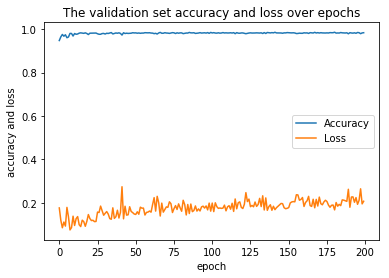

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
accurate = init_result.history['val_acc']
loss = init_result.history['val_loss']
plt.plot(accurate)
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('accuracy and loss')
plt.legend(['Accuracy', 'Loss'])
plt.title('The validation set accuracy and loss over epochs')
plt.rcParams["figure.figsize"] = [20,20]
plt.show()

In [12]:
loss_lst = []
for loss in init_result.history['val_loss']:
    loss_lst.append(loss)
min_loss = min(loss_lst)
min_idx = loss_lst.index(min_loss)
print('The performance of the model degrades starting from epoch = ', (min_idx+1))

The performance of the model degrades starting from epoch =  8


ii. Implement dropout

In [13]:
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(512, activation='relu'))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(512, activation='relu'))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(512, activation='relu'))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(10, activation='softmax'))
network2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result2 = network2.fit(train_images2, train_labels2, \
                       validation_data=(test_images2,test_labels2), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.7097 - acc: 0.7670 - val_loss: 0.2206 - val_acc: 0.9346
Epoch 2/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2748 - acc: 0.9223 - val_loss: 0.1680 - val_acc: 0.9505
Epoch 3/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.2019 - acc: 0.9427 - val_loss: 0.1689 - val_acc: 0.9521
Epoch 4/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1653 - acc: 0.9519 - val_loss: 0.1124 - val_acc: 0.9659
Epoch 5/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1454 - acc: 0.9591 - val_loss: 0.0955 - val_acc: 0.9710
Epoch 6/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1280 - acc: 0.9649 - val_loss: 0.0912 - val_acc: 0.9735
Epoch 7/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1169 - acc: 0.9667 - val_loss: 0.0843 - 

Epoch 118/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0558 - acc: 0.9920 - val_loss: 0.1174 - val_acc: 0.9847
Epoch 119/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0622 - acc: 0.9905 - val_loss: 0.1094 - val_acc: 0.9840
Epoch 120/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0623 - acc: 0.9909 - val_loss: 0.1120 - val_acc: 0.9845
Epoch 121/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0615 - acc: 0.9909 - val_loss: 0.1272 - val_acc: 0.9839
Epoch 122/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0609 - acc: 0.9911 - val_loss: 0.1177 - val_acc: 0.9837
Epoch 123/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0567 - acc: 0.9918 - val_loss: 0.1246 - val_acc: 0.9833
Epoch 124/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0643 - acc: 0.9912 - val_loss: 0.1151 - val_acc: 0.9836
Epoch 125/200
50000/

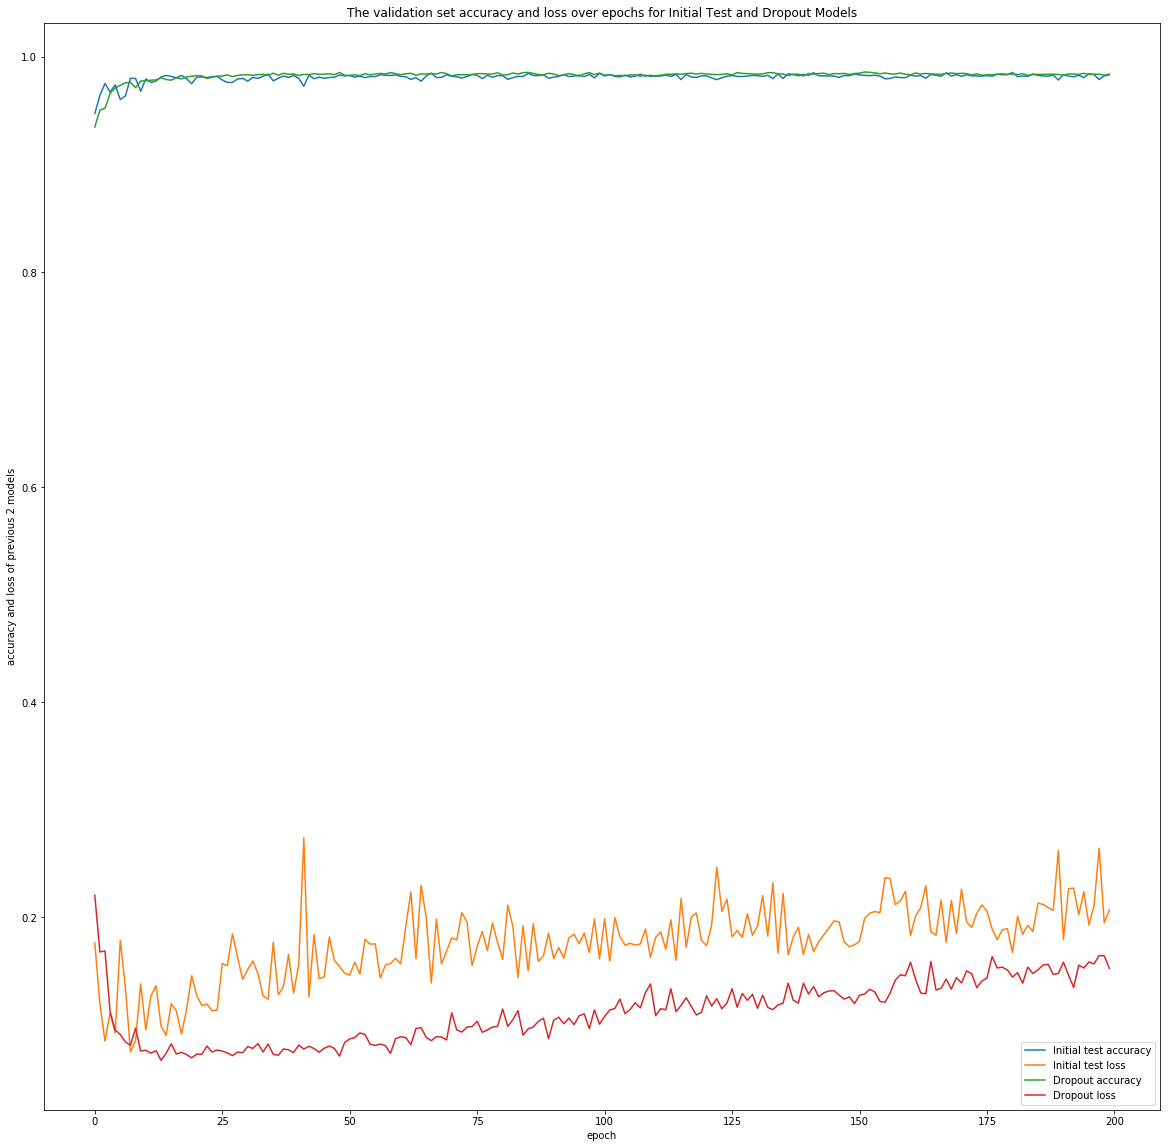

In [14]:
accurate = init_result.history['val_acc']
loss = init_result.history['val_loss']
acc2 = result2.history['val_acc']
loss2 = result2.history['val_loss']
plt.plot(accurate)
plt.plot(loss)
plt.plot(acc2)
plt.plot(loss2)
plt.xlabel('epoch')
plt.ylabel('accuracy and loss of previous 2 models')
plt.legend(['Initial test accuracy', 'Initial test loss', 'Dropout accuracy', 'Dropout loss'])
plt.title('The validation set accuracy and loss over epochs for Initial Test and Dropout Models')
plt.rcParams["figure.figsize"] = [20,20]
plt.show()

This new model performs significantly better than the original one, since this model's loss curve is substantially below the loss curve of initial model.

iii. Weight regularization

In [15]:
from keras import regularizers
from keras.regularizers import l1, l2
network31 = models.Sequential()
network31.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28 * 28,)))
network31.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
network31.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
network31.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
network31.add(layers.Dense(10, activation='softmax'))
network31.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result31 = network31.fit(train_images2, train_labels2, \
                          validation_data=(test_images2, test_labels2), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 24us/step - loss: 13.9822 - acc: 0.6690 - val_loss: 4.3247 - val_acc: 0.7149
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 3.0780 - acc: 0.7920 - val_loss: 2.5273 - val_acc: 0.7741
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 2.2151 - acc: 0.8311 - val_loss: 2.1112 - val_acc: 0.7938
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.8782 - acc: 0.8580 - val_loss: 1.7540 - val_acc: 0.8710
Epoch 5/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.6933 - acc: 0.8734 - val_loss: 1.6379 - val_acc: 0.8814
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.5736 - acc: 0.8858 - val_loss: 1.5220 - val_acc: 0.8927
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.4795 - acc: 0.8961 - val_loss: 1.4504 -

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9052 - acc: 0.9574 - val_loss: 0.9359 - val_acc: 0.9456
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9018 - acc: 0.9592 - val_loss: 0.9180 - val_acc: 0.9512
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9035 - acc: 0.9579 - val_loss: 0.9237 - val_acc: 0.9513
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9040 - acc: 0.9579 - val_loss: 0.9023 - val_acc: 0.9573
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9030 - acc: 0.9583 - val_loss: 0.9345 - val_acc: 0.9481
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9002 - acc: 0.9586 - val_loss: 0.9049 - val_acc: 0.9555
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9011 - acc: 0.9588 - val_loss: 0.9344 - val_acc: 0.9480
Epoch 125/200
50000/

In [16]:
network32 = models.Sequential()
network32.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network32.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
network32.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
network32.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
network32.add(layers.Dense(10, activation='softmax'))
network32.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result32 = network32.fit(train_images2, train_labels2, \
                          validation_data=(test_images2, test_labels2), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 24us/step - loss: 1.7913 - acc: 0.8281 - val_loss: 1.1515 - val_acc: 0.8991
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8295 - acc: 0.9361 - val_loss: 0.6630 - val_acc: 0.9377
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5222 - acc: 0.9532 - val_loss: 0.4347 - val_acc: 0.9595
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3886 - acc: 0.9608 - val_loss: 0.3353 - val_acc: 0.9662
Epoch 5/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3243 - acc: 0.9651 - val_loss: 0.2843 - val_acc: 0.9702
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.2778 - acc: 0.9696 - val_loss: 0.2619 - val_acc: 0.9684
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.2547 - acc: 0.9707 - val_loss: 0.2365 - 

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0836 - acc: 0.9914 - val_loss: 0.1866 - val_acc: 0.9592
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0839 - acc: 0.9921 - val_loss: 0.1209 - val_acc: 0.9783
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0857 - acc: 0.9912 - val_loss: 0.1168 - val_acc: 0.9809
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0817 - acc: 0.9920 - val_loss: 0.1436 - val_acc: 0.9731
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0837 - acc: 0.9913 - val_loss: 0.1319 - val_acc: 0.9765
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0833 - acc: 0.9913 - val_loss: 0.1158 - val_acc: 0.9818
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0822 - acc: 0.9922 - val_loss: 0.1173 - val_acc: 0.9793
Epoch 125/200
50000/

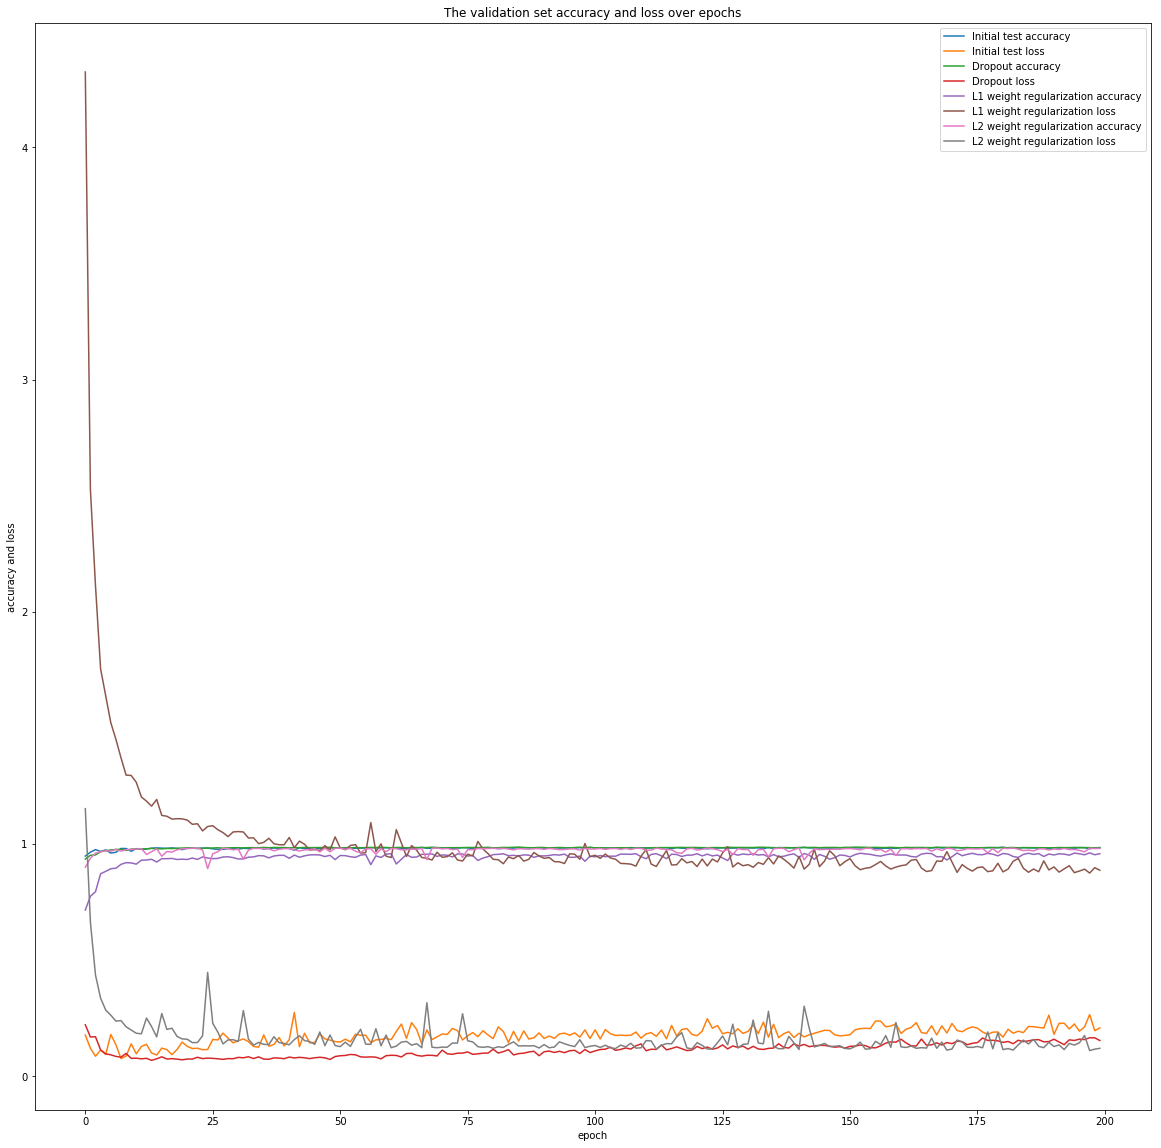

In [17]:
accurate = init_result.history['val_acc']
loss = init_result.history['val_loss']
acc2 = result2.history['val_acc']
loss2 = result2.history['val_loss']
acc31 = result31.history['val_acc']
loss31 = result31.history['val_loss']
acc32 = result32.history['val_acc']
loss32 = result32.history['val_loss']
plt.plot(accurate)
plt.plot(loss)
plt.plot(acc2)
plt.plot(loss2)
plt.plot(acc31)
plt.plot(loss31)
plt.plot(acc32)
plt.plot(loss32)
plt.xlabel('epoch')
plt.ylabel('accuracy and loss')
plt.legend(['Initial test accuracy', 'Initial test loss', 'Dropout accuracy', 'Dropout loss', \
           'L1 weight regularization accuracy', 'L1 weight regularization loss', \
           'L2 weight regularization accuracy', 'L2 weight regularization loss'])
plt.title('The validation set accuracy and loss over epochs')
plt.rcParams["figure.figsize"] = [20,20]
plt.show()

The dropout model seems to perfom the best, because its loss curve is relatively the lowest among all loss curves

iv. Final model

From the plot in part (iii), the best model is the dropout model.

In [18]:
result4 = network2.fit(train_images, train_labels, epochs=200, batch_size=512)

Epoch 1/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.1094 - acc: 0.9883
Epoch 2/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1187 - acc: 0.9873
Epoch 3/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1208 - acc: 0.9862
Epoch 4/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1105 - acc: 0.9873
Epoch 5/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1151 - acc: 0.9868
Epoch 6/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1088 - acc: 0.9881
Epoch 7/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.1210 - acc: 0.9875
Epoch 8/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.1170 - acc: 0.9875
Epoch 9/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1120 - acc: 0.9878
Epoch 10/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1038 - a

60000/60000 [==============================] - 1s 16us/step - loss: 0.1576 - acc: 0.9879
Epoch 161/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1445 - acc: 0.9889
Epoch 162/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1739 - acc: 0.9870
Epoch 163/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1582 - acc: 0.9880
Epoch 164/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1479 - acc: 0.9889
Epoch 165/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1553 - acc: 0.9881
Epoch 166/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1683 - acc: 0.9875
Epoch 167/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1740 - acc: 0.9873
Epoch 168/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.1759 - acc: 0.9872
Epoch 169/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.170

In [19]:
test_loss, test_acc = network2.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 48us/step
test_acc: 0.9825


It performs better than the baseline model, which has test accuracy 0.9785

## Reference:  
Chollet, Francois. Deep learning with python. Manning Publications Co., 2017.